In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv(r"C:\Users\aliya\DSI_Participant\Team_2_Pharmaceutical_Drug_Spending_by_Countries\Data\flat-ui__data-Tue Mar 11 2025.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB


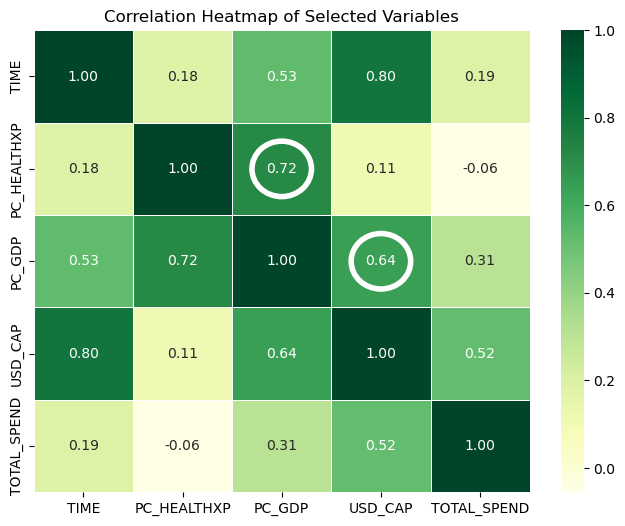

In [ ]:
# Selecting only numerical columns for the heatmap
numeric_cols = ['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
df_numeric = df[numeric_cols]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt=".2f", linewidths=0.5)

# Identify the position of PC_GDP & PC_HEALTHXP in the correlation matrix
x_idx = numeric_cols.index("PC_GDP")  
y_idx = numeric_cols.index("PC_HEALTHXP")  

x_idx2 = numeric_cols.index("USD_CAP")  
y_idx2 = numeric_cols.index("PC_GDP")

# Function to draw circles
def draw_circle(x, y):
    circle = plt.Circle((x + 0.5, y + 0.5), 0.3, color='white', fill=False, linewidth=4)
    ax.add_patch(circle)

# Draw circles on the specified correlation values
draw_circle(x_idx, y_idx)  # PC_GDP vs PC_HEALTHXP
draw_circle(x_idx2, y_idx2)  # USD_CAP vs PC_GDP

# Title
plt.title("Correlation Heatmap of Selected Variables")
# plt.savefig("correlation_heatmap.png", format="png", dpi=300, bbox_inches="tight")  # Saving the file as png
plt.show()

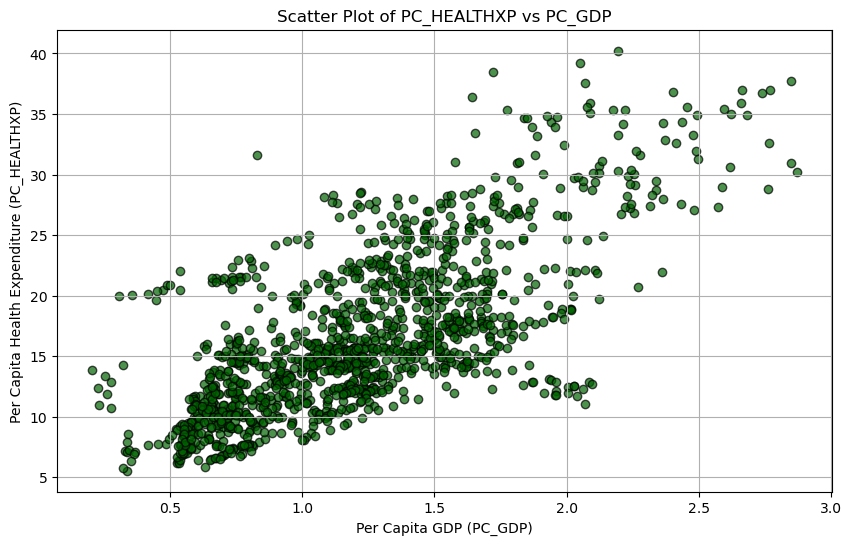

In [ ]:
# Create the scatter plot to show all reading in the csv file
plt.figure(figsize=(10, 6))
plt.scatter(df['PC_GDP'], df['PC_HEALTHXP'], color='darkgreen', alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel('Per Capita GDP (PC_GDP)')
plt.ylabel('Per Capita Health Expenditure (PC_HEALTHXP)')
plt.title('Scatter Plot of PC_HEALTHXP vs PC_GDP')
plt.grid(True)

# plt.savefig("scatterplot_1_all_locations_all_time.png", format="png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

In [11]:
from matplotlib.colors import ListedColormap

C:\Users\aliya\AppData\Local\Temp\ipykernel_9528\2034842204.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


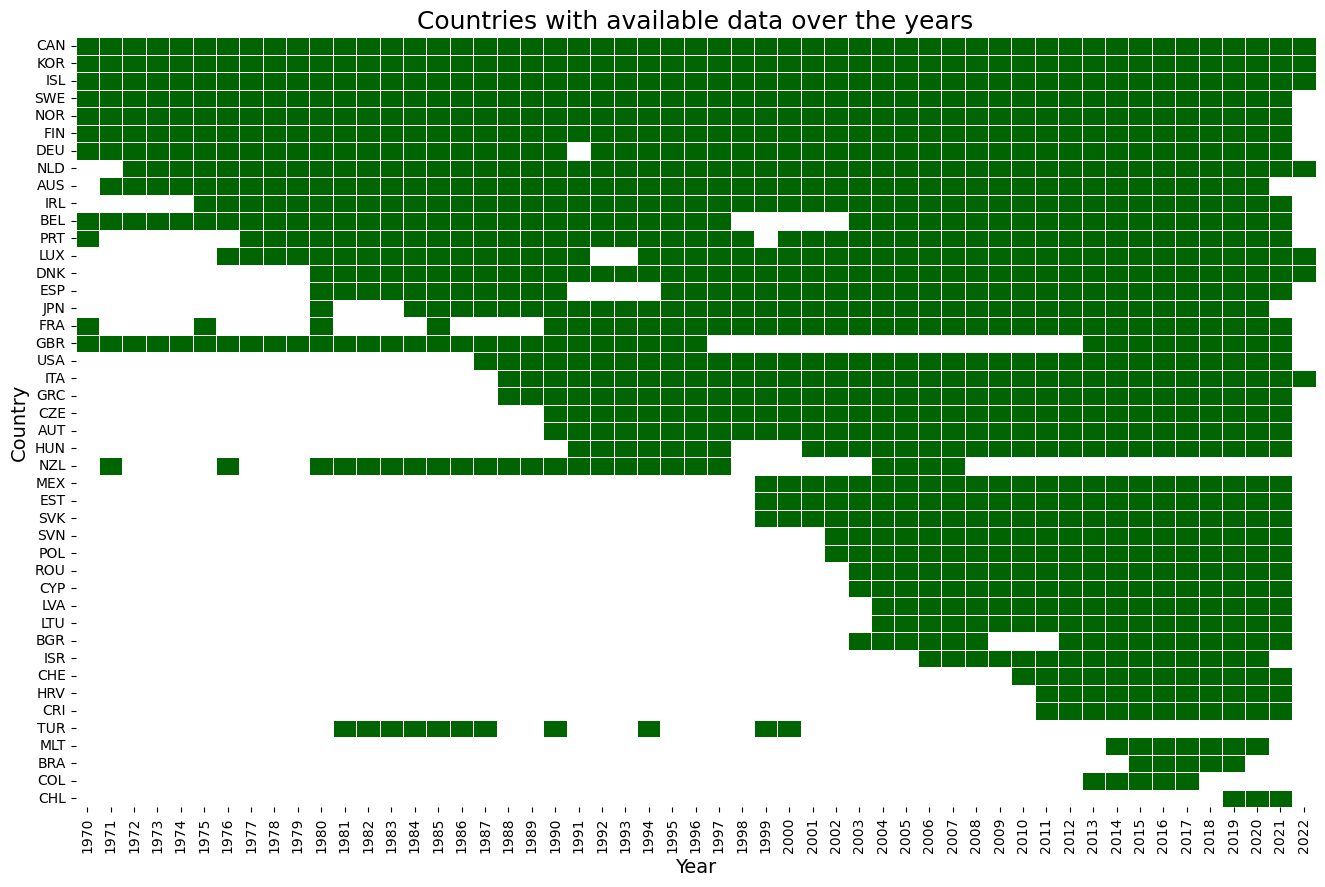

In [ ]:
# Create a pivot table with countries to see how many values are we missing
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap with green boxes and white background.
plt.figure(figsize=(16, 10), facecolor='white')  # Set figure background to white
heatmap = sns.heatmap(
    pivot_table_sorted,
    cmap=sns.color_palette(['white', 'darkgreen']), # White for 0, light green for 1
    cbar=False,
    linewidths=.5,
    linecolor='white' #Set grid line color to white
)

# Add labels and title
plt.rcParams['font.family'] = 'sans-serif' #set global font to sans-serif
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Countries with available data over the years', fontsize=18)

# plt.savefig("pivot_table.png", format="png", dpi=300, bbox_inches="tight")
# Display the heatmap
plt.show()

After looking at the Pivot table we can see that majortiy of the countries have data which falls in 2011 - 2021. Our goal is to get the most recent data with the maximum number of observation. We have planted a table below to see which countries have missing values in this timeframe

In [13]:
# Define the full range of years
total_years = set(range(2011, 2021))  # 2011 to 2021 (inclusive)

# Calculate number of observations, missing values, and % missing
summary_list = []

for country in df['LOCATION'].unique():
    observed_years = set(df[df['LOCATION'] == country]['TIME'])
    num_observations = len(observed_years)
    num_missing = len(total_years - observed_years)
    percent_missing = (num_missing / len(total_years)) * 100
    
    summary_list.append([country, num_observations, num_missing, f"{percent_missing:.2f}%"])

# Create DataFrame
summary_df = pd.DataFrame(summary_list, columns=['Country Code', '# of Observations', '# of Missing Values from 2011 to 2021', '% Missing'])

# Sort by % missing (descending order)
summary_df = summary_df.sort_values(by='% Missing', ascending=True)

summary_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)



,Country Code,# of Observations,# of Missing Values from 2011 to 2021,% Missing
0,AUS,50,0,0.00%
23,ISL,53,0,0.00%
24,ISR,15,0,0.00%
25,ITA,35,0,0.00%
26,JPN,38,0,0.00%
27,KOR,53,0,0.00%
28,LTU,18,0,0.00%
29,LUX,45,0,0.00%
30,LVA,18,0,0.00%
31,MEX,23,0,0.00%


In [14]:
# Filter the DataFrame for the years 2021
df_filtered = df[df['TIME'].isin([2021])]

# Get the unique countries for each year
countries_2021 = df_filtered[df_filtered['TIME'] == 2021]['LOCATION'].unique()


# Count the number of countries
num_countries_2021 = len(countries_2021)

# Filter the DataFrame for the years 2022
df_filtered_2 = df[df['TIME'].isin([2022])]

# Get the unique countries for each year
countries_2022 = df_filtered_2[df_filtered_2['TIME'] == 2022]['LOCATION'].unique()


# Count the number of countries
num_countries_2022 = len(countries_2022)

# Print the result
print("Countries with values in both 2021:", countries_2021)
print("Number of countries with values in both 2021:", num_countries_2021)
print("Countries with values in both 2022:", countries_2022)
print("Number of countries with values in both 2022:", num_countries_2022)

Countries with values in both 2021: ['AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'CHL' 'CRI' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP'
 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ITA' 'KOR' 'LTU'
 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'USA']
Number of countries with values in both 2021: 36
Countries with values in both 2022: ['CAN' 'DNK' 'ISL' 'ITA' 'KOR' 'LUX' 'NLD']
Number of countries with values in both 2022: 7


Now that we have selected our years we will be doing data imputation. By taking median as the imputed value. 

In [15]:
# Filter data for the years 2011 to 2021
df_filtered_years = df[df['TIME'].between(2011, 2021, inclusive='both')].copy()

# Count the number of observations per country in the filtered timeframe
observation_counts = df_filtered_years['LOCATION'].value_counts()

# Identify countries with at least 5 observations
countries_to_keep = observation_counts[observation_counts >= 5].index

# Create a new DataFrame with only the selected countries
df_cleaned = df_filtered_years[df_filtered_years['LOCATION'].isin(countries_to_keep)].copy()

# Impute missing years with the median for each country
def impute_missing_years(group):
    years = group['TIME'].unique()
    all_years = range(2011, 2022)
    missing_years = set(all_years) - set(years)

    if missing_years:
        median_values = group.median(numeric_only=True) #added mean here as Data might be skewed for some years. Median value will be a better impute
        for year in missing_years:
            new_row = {'LOCATION': group['LOCATION'].iloc[0], 'TIME': year}
            for col in median_values.index:
                if col not in ['LOCATION', 'TIME']:
                    new_row[col] = median_values[col]
            group = pd.concat([group, pd.Series(new_row).to_frame().T], ignore_index=True)
    return group.sort_values(by='TIME')

df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)

# Reset index for the final cleaned and imputed DataFrame
df_imputed = df_imputed.reset_index(drop=True)

df_imputed

C:\Users\aliya\AppData\Local\Temp\ipykernel_9528\4261533212.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,2011,15.311,1.307,583.222,13029.19
1,AUS,2012,15.308,1.328,589.993,13412.59
2,AUS,2013,14.345,1.255,586.402,13562.38
3,AUS,2014,12.498,1.229,569.455,13368.35
4,AUS,2015,12.442,1.267,594.233,14152.25
...,...,...,...,...,...,...
446,USA,2017,11.954,2.004,1200.769,390396.57
447,USA,2018,11.766,1.957,1229.266,401771.09
448,USA,2019,11.767,1.961,1277.032,419287.86
449,USA,2020,11.037,2.07,1315.218,436030.19


In [ ]:
# df_imputed.to_csv('processed_data.csv', index=False) # → was done to download the file with imputations to the our working directory